In [1]:
# Libararies

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import ast
from textblob import TextBlob

from sklearn.preprocessing import MinMaxScaler
from category_encoders import BinaryEncoder

import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

import nltk
# Download necessary NLTK datasets only once
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

from sklearn.feature_extraction.text import TfidfVectorizer
import category_encoders as ce

import re
from scipy.sparse import hstack

from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.random_projection import SparseRandomProjection

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

import xgboost as xgb
import numpy as np

from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import ElasticNet

from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

from gensim.models import Word2Vec

from sklearn.linear_model import LinearRegression


# Task 2: EDA

In [2]:
#Articles
df1 = pd.read_csv('ArticlesJan2017.csv')
df2 = pd.read_csv('ArticlesFeb2017.csv')
df3 = pd.read_csv('ArticlesMarch2017.csv')


#Comments
df10 = pd.read_csv('CommentsJan2017.csv')
df11 = pd.read_csv('CommentsFeb2017.csv')
df12= pd.read_csv('CommentsMarch2017.csv')


In [3]:
# Number of attributes and data points
df1.shape

(850, 16)

In [200]:
# Combining all articles into a single DataFrame `articles_df`
articles_df = pd.concat([df1,df2,df3], join='inner',ignore_index=True)

In [4]:
# Using head to take a look at the dataset
articles_df.head(3)

,articleID,abstract,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL,articleWordCount
0,58691a5795d0e039260788b9,NaN,By JENNIFER STEINHAUER,article,G.O.P. Leadership Poised to Topple Obama’s Pi...,"['United States Politics and Government', 'Law...",1,National,1,2017-01-01 15:03:38,Politics,The most powerful and ambitious Republican-led...,The New York Times,News,https://www.nytimes.com/2017/01/01/us/politics...,1324
1,586967bf95d0e03926078915,NaN,By MARK LANDLER,article,Fractured World Tested the Hope of a Young Pre...,"['Obama, Barack', 'Afghanistan', 'United State...",1,Foreign,1,2017-01-01 20:34:00,Asia Pacific,A strategy that went from a “good war” to the ...,The New York Times,News,https://www.nytimes.com/2017/01/01/world/asia/...,2836
2,58698a1095d0e0392607894a,NaN,By CAITLIN LOVINGER,article,Little Troublemakers,"['Crossword Puzzles', 'Boxing Day', 'Holidays ...",1,Games,0,2017-01-01 23:00:24,Unknown,Chuck Deodene puts us in a bubbly mood.,The New York Times,News,https://www.nytimes.com/2017/01/01/crosswords/...,445


In [5]:
articles_df.shape

(2684, 16)

In [4]:
df10.shape

(231449, 34)

In [201]:
# Combining all comments into a single DataFrame `comments_df`
comments_df = pd.concat([df10,df11,df12], join='inner',ignore_index=True)
comments_df.head(2)

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,...,status,timespeople,trusted,updateDate,userDisplayName,userID,userLocation,userTitle,userURL,typeOfMaterial
0,1483455908,58691a5795d0e039260788b9,1324,For all you Americans out there --- still rejo...,20969730.0,20969730.0,<br/>,comment,1483426105,1.0,...,approved,1,0,1483455908,N. Smith,64679318.0,New York City,NaN,NaN,News
1,1483455656,58691a5795d0e039260788b9,1324,Obamas policies may prove to be the least of t...,20969325.0,20969325.0,<br/>,comment,1483417407,1.0,...,approved,1,0,1483455656,Kilocharlie,69254188.0,Phoenix,NaN,NaN,News


In [7]:
comments_df.shape

(725823, 34)

In [210]:
# Merging articles and comments into a single DataFrame `merge_df`.
merge_df = pd.merge(articles_df, comments_df, on='articleID', how='outer', indicator=False)
merge_df.head(2)

,articleID,abstract,byline,documentType,headline,keywords,multimedia,newDesk_x,printPage_x,pubDate,...,status,timespeople,trusted,updateDate,userDisplayName,userID,userLocation,userTitle,userURL,typeOfMaterial_y
0,58691a5795d0e039260788b9,NaN,By JENNIFER STEINHAUER,article,G.O.P. Leadership Poised to Topple Obama’s Pi...,"['United States Politics and Government', 'Law...",1,National,1,2017-01-01 15:03:38,...,approved,1,0,1483455908,N. Smith,64679318.0,New York City,NaN,NaN,News
1,58691a5795d0e039260788b9,NaN,By JENNIFER STEINHAUER,article,G.O.P. Leadership Poised to Topple Obama’s Pi...,"['United States Politics and Government', 'Law...",1,National,1,2017-01-01 15:03:38,...,approved,1,0,1483455656,Kilocharlie,69254188.0,Phoenix,NaN,NaN,News


In [9]:
merge_df.columns

Index(['articleID', 'abstract', 'byline', 'documentType', 'headline',
       'keywords', 'multimedia', 'newDesk_x', 'printPage_x', 'pubDate',
       'sectionName_x', 'snippet', 'source', 'typeOfMaterial_x', 'webURL',
       'articleWordCount_x', 'approveDate', 'articleWordCount_y',
       'commentBody', 'commentID', 'commentSequence', 'commentTitle',
       'commentType', 'createDate', 'depth', 'editorsSelection', 'inReplyTo',
       'newDesk_y', 'parentID', 'parentUserDisplayName', 'permID', 'picURL',
       'printPage_y', 'recommendations', 'recommendedFlag', 'replyCount',
       'reportAbuseFlag', 'sectionName_y', 'sharing', 'status', 'timespeople',
       'trusted', 'updateDate', 'userDisplayName', 'userID', 'userLocation',
       'userTitle', 'userURL', 'typeOfMaterial_y'],
      dtype='object')

In [211]:
# Dropping unnecessary columns
merge_df.drop(columns=['articleWordCount_y','newDesk_y','printPage_y','sectionName_y','typeOfMaterial_y'],inplace=True, axis=1)

# NA Values

In [212]:
# Looking at the percentage of NULL values
merge_df.isnull().sum()/merge_df.shape[0]

articleID                0.000000
abstract                 0.988636
byline                   0.000000
documentType             0.000000
headline                 0.000000
keywords                 0.000000
multimedia               0.000000
newDesk_x                0.000000
printPage_x              0.000000
pubDate                  0.000000
sectionName_x            0.000000
snippet                  0.000000
source                   0.000000
typeOfMaterial_x         0.000000
webURL                   0.000000
articleWordCount_x       0.000000
approveDate              0.000000
commentBody              0.000000
commentID                0.000000
commentSequence          0.000000
commentTitle             0.058817
commentType              0.000000
createDate               0.000000
depth                    0.000000
editorsSelection         0.000000
inReplyTo                0.000000
parentID                 0.000000
parentUserDisplayName    0.752687
permID                   0.000000
picURL        

In [213]:
# Dropping Unnecessary Columns
dfGraph = merge_df.drop(columns=['abstract','parentUserDisplayName','reportAbuseFlag','recommendedFlag','userTitle','userURL'],axis=1)

In [214]:
dfGraph.shape

(729597, 38)

# Summary of Data 

### Distribution of documentType

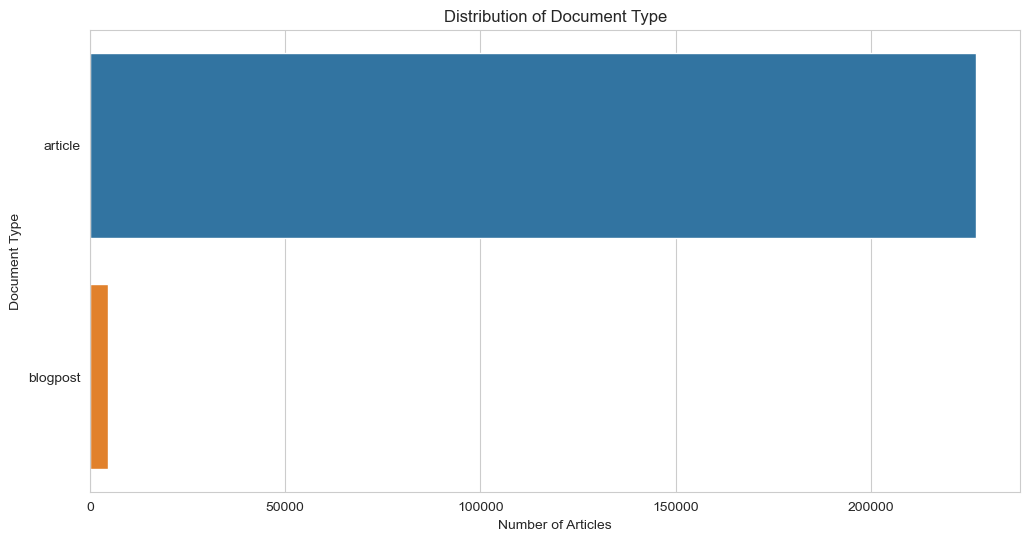

In [215]:
# Set seaborn plot style to "whitegrid", create a figure with specified size, and plot a countplot of 'documentType' from 'df', ordered by frequency. Then, label the plot and display it.

sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='documentType', order=dfGraph['documentType'].value_counts().index)
plt.title('Distribution of Document Type')
plt.xlabel('Number of Articles')
plt.ylabel('Document Type')
plt.show()


### The top 10 authors (from byline) with the most articles 

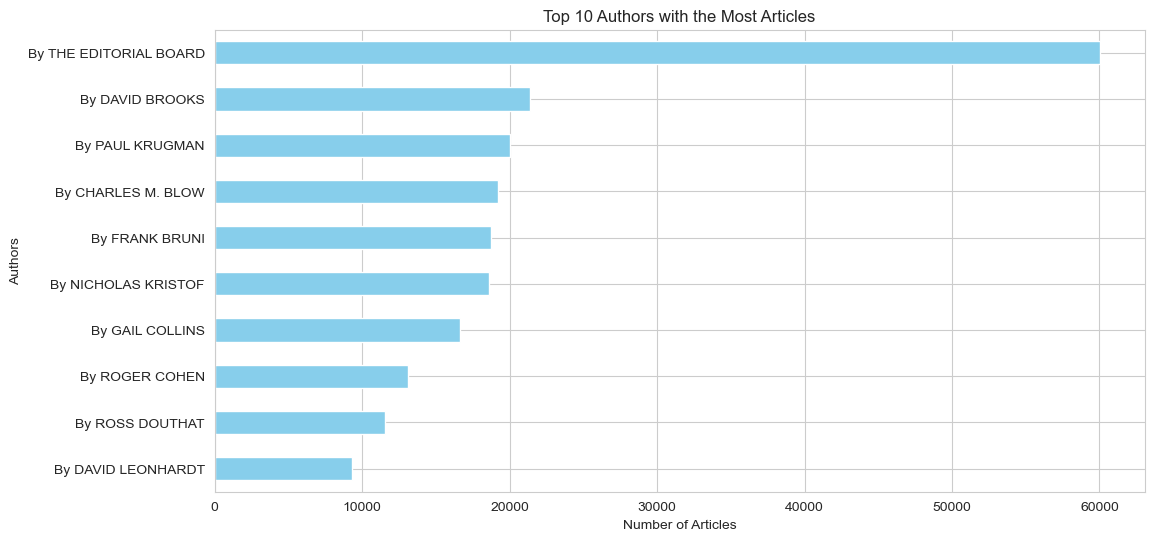

In [216]:

top_authors = dfGraph['byline'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_authors.plot(kind='barh', color='skyblue')
plt.title('Top 10 Authors with the Most Articles')
plt.xlabel('Number of Articles')
plt.ylabel('Authors')
plt.gca().invert_yaxis()  
plt.show()


### Distribution of articles over printPage_x

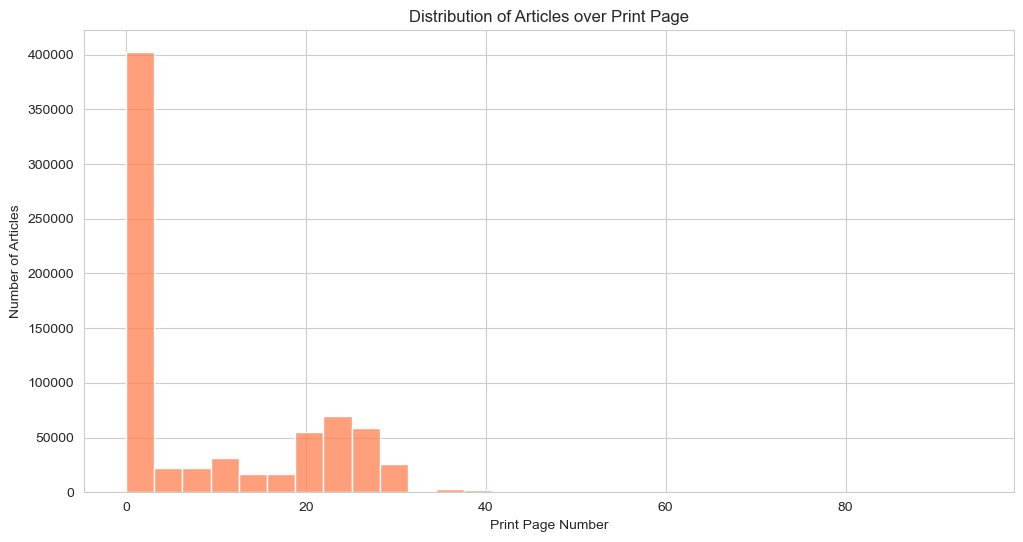

In [217]:
plt.figure(figsize=(12, 6))
sns.histplot(data=dfGraph, x='printPage_x', bins=30, color='coral')
plt.title('Distribution of Articles over Print Page')
plt.xlabel('Print Page Number')
plt.ylabel('Number of Articles')
plt.show()


### The 10 most common keywords 

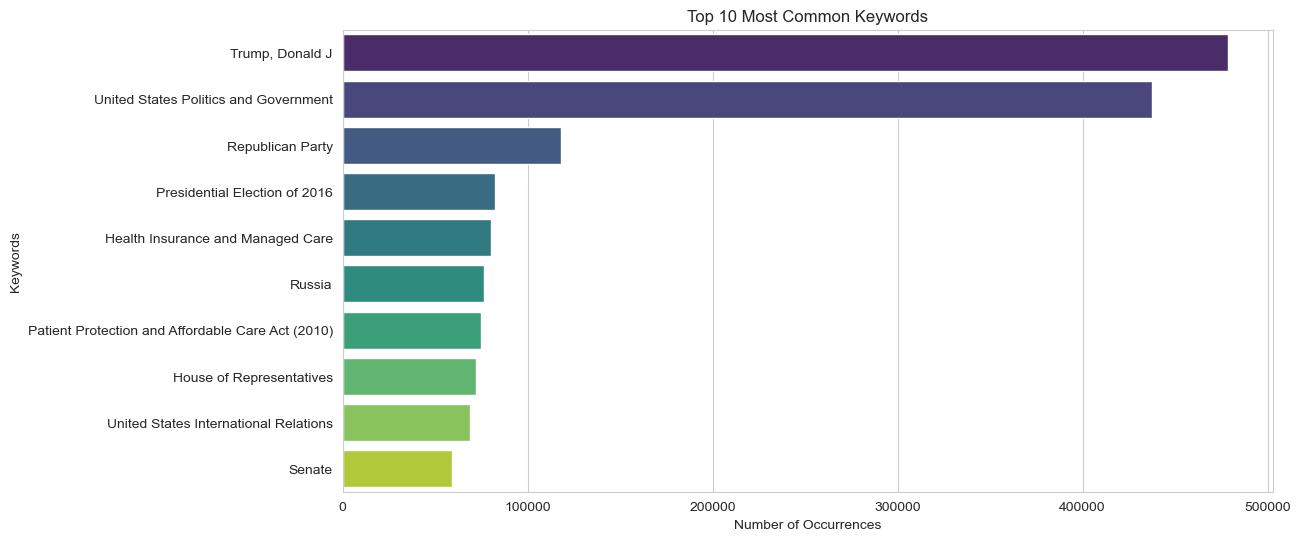

In [218]:
# Define a function to safely evaluate string literals to Python objects, apply it to convert 'keywords' column in `dfGraph` to lists, aggregate all keywords, count their occurrences, and plot the top 10 most common keywords in a seaborn barplot with custom styling and dimensions.

def safe_literal_eval(s):
    try:
        return ast.literal_eval(s)
    except (ValueError, SyntaxError):
        return []


dfGraph['keywords2'] = dfGraph['keywords'].apply(safe_literal_eval)


all_keywords = [keyword for sublist in dfGraph['keywords2'].dropna() for keyword in sublist]

keyword_counts = Counter(all_keywords)

top_keywords = keyword_counts.most_common(10)

df_keywords = pd.DataFrame(top_keywords, columns=['Keyword', 'Count'])

plt.figure(figsize=(12, 6))
sns.barplot(data=df_keywords, x='Count', y='Keyword', palette='viridis')
plt.title('Top 10 Most Common Keywords')
plt.xlabel('Number of Occurrences')
plt.ylabel('Keywords')
plt.show()



### Distribution of articles over newDesk

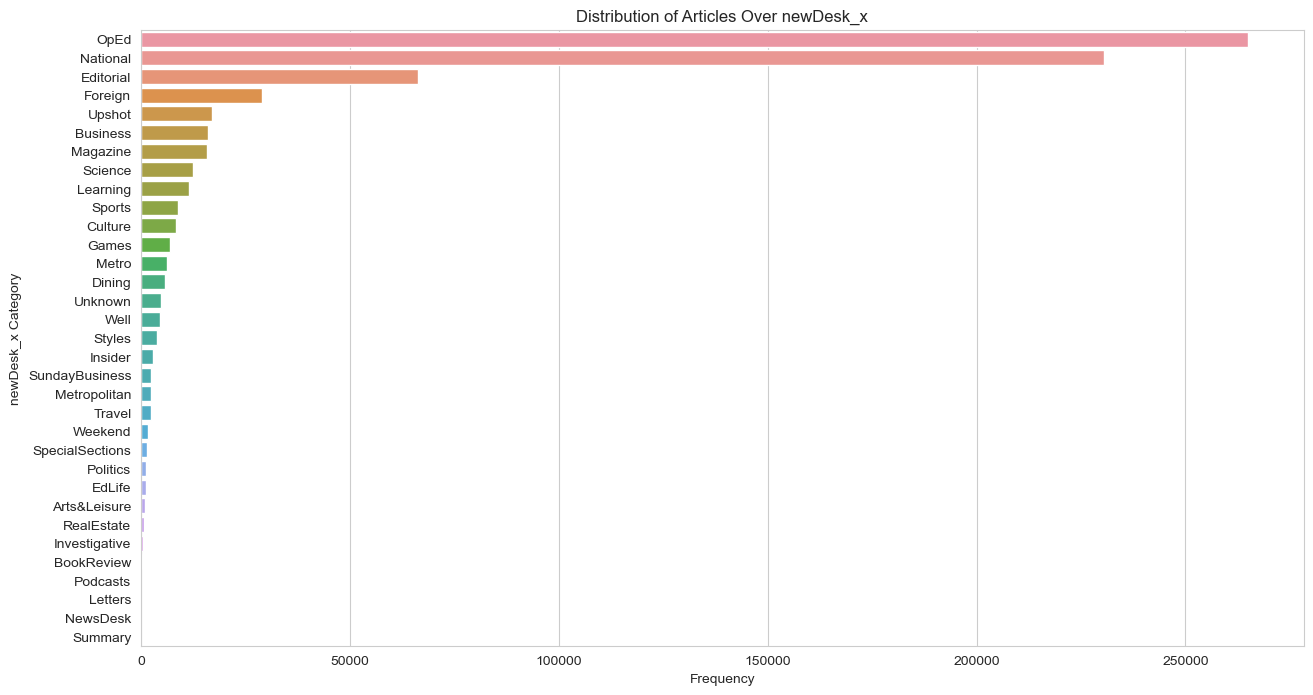

In [219]:
plt.figure(figsize=(15, 8))
sns.countplot(data=dfGraph, y='newDesk_x', order=dfGraph['newDesk_x'].value_counts().index)
plt.title('Distribution of Articles Over newDesk_x')
plt.xlabel('Frequency')
plt.ylabel('newDesk_x Category')
plt.show()


### Distribution of article pubDate over time. 

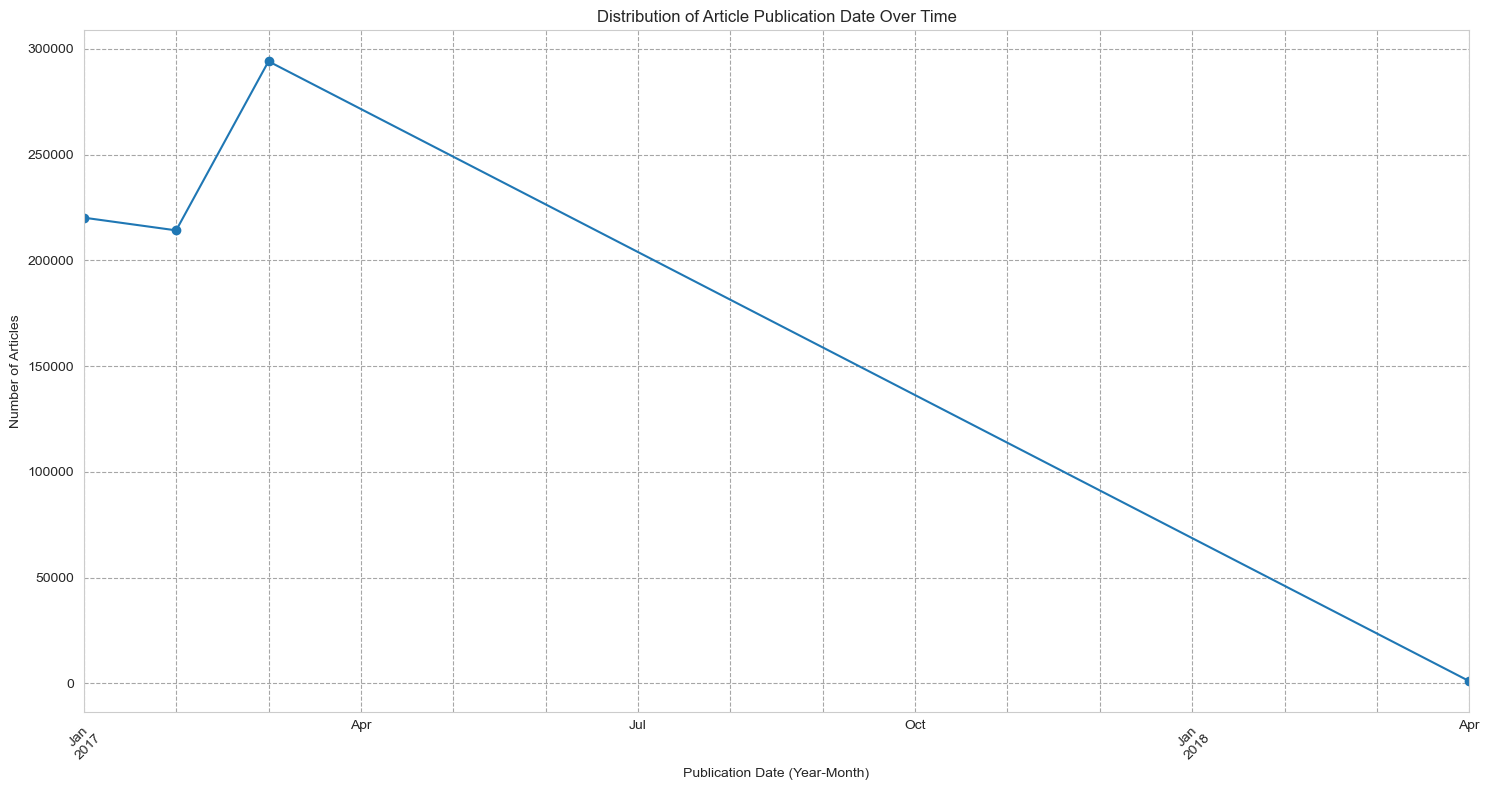

In [220]:
# Convert 'pubDate' in `dfGraph` to datetime, extract year-month as a period, and plot a time series line chart showing the monthly distribution of article publications, with custom styling for clarity and visual appeal.

dfGraph['pubDate'] = pd.to_datetime(dfGraph['pubDate'])

dfGraph['Year_Month'] = dfGraph['pubDate'].dt.to_period('M')

plt.figure(figsize=(15, 8))
dfGraph['Year_Month'].value_counts().sort_index().plot(kind='line', marker='o', linestyle='-')
plt.title('Distribution of Article Publication Date Over Time')
plt.xlabel('Publication Date (Year-Month)')
plt.ylabel('Number of Articles')
plt.grid(True, which="both", ls="--", c='0.65')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### The top 10 user locations (userLocation) providing feedback. 

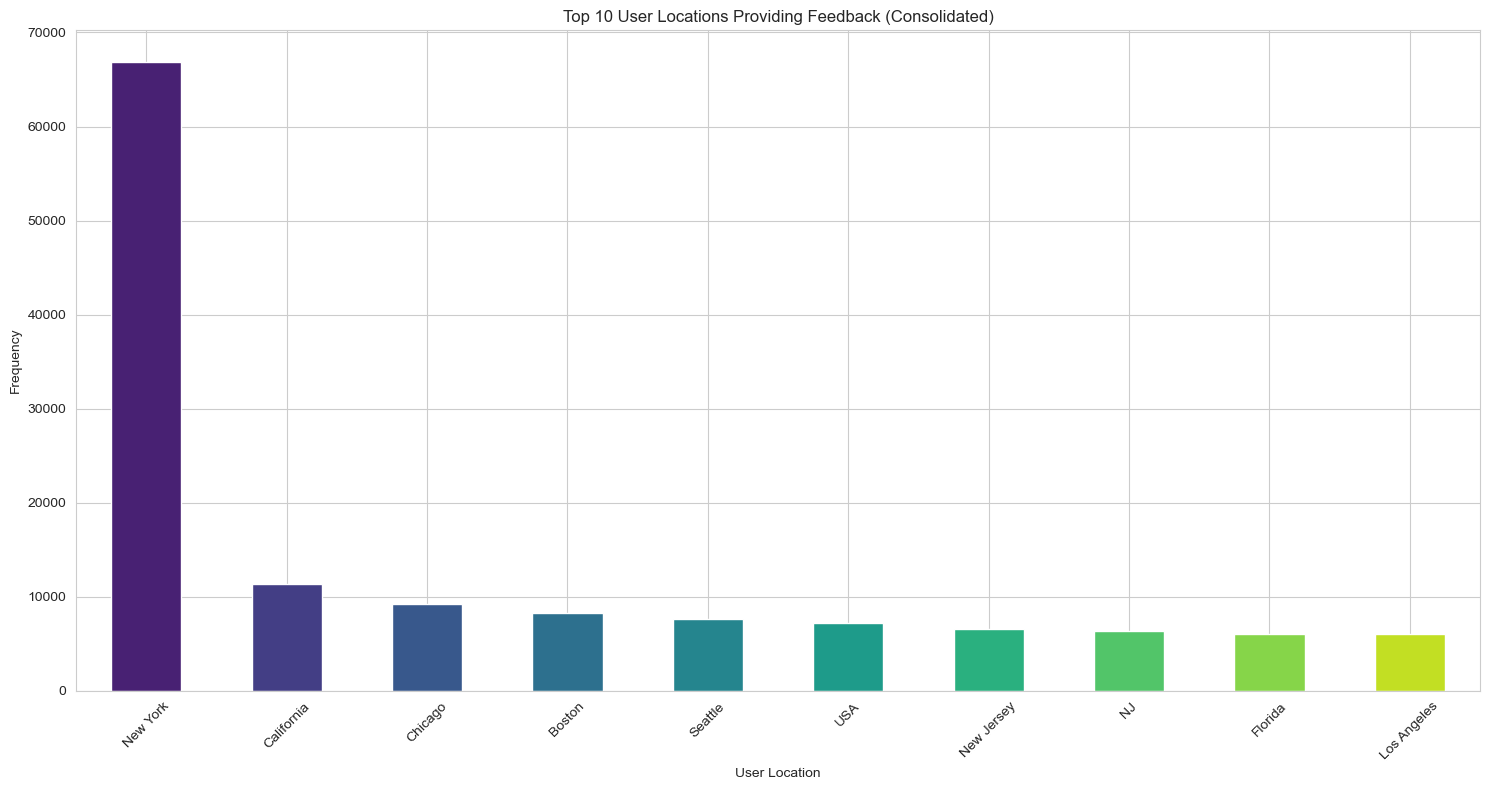

In [221]:
# Clean 'userLocation' in `dfGraph` by consolidating variations of "New York" and removing HTML breaks, then plot a bar chart of the top 10 user locations post-cleaning, using a "viridis" color palette for visual distinction.

dfGraph['userLocation_cleaned'] = dfGraph['userLocation'].replace({
    'NYC': 'New York',
    'New York City': 'New York',
    'NY': 'New York',
    'New York, NY': 'New York',
    '<br/>': None
})

plt.figure(figsize=(15, 8))
top_10_locations_cleaned = dfGraph['userLocation_cleaned'].value_counts().head(10)
top_10_locations_cleaned.plot(kind='bar', color=sns.color_palette("viridis", 10))
plt.title('Top 10 User Locations Providing Feedback (Consolidated)')
plt.xlabel('User Location')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Distribution of wordCount (to see the length of articles)

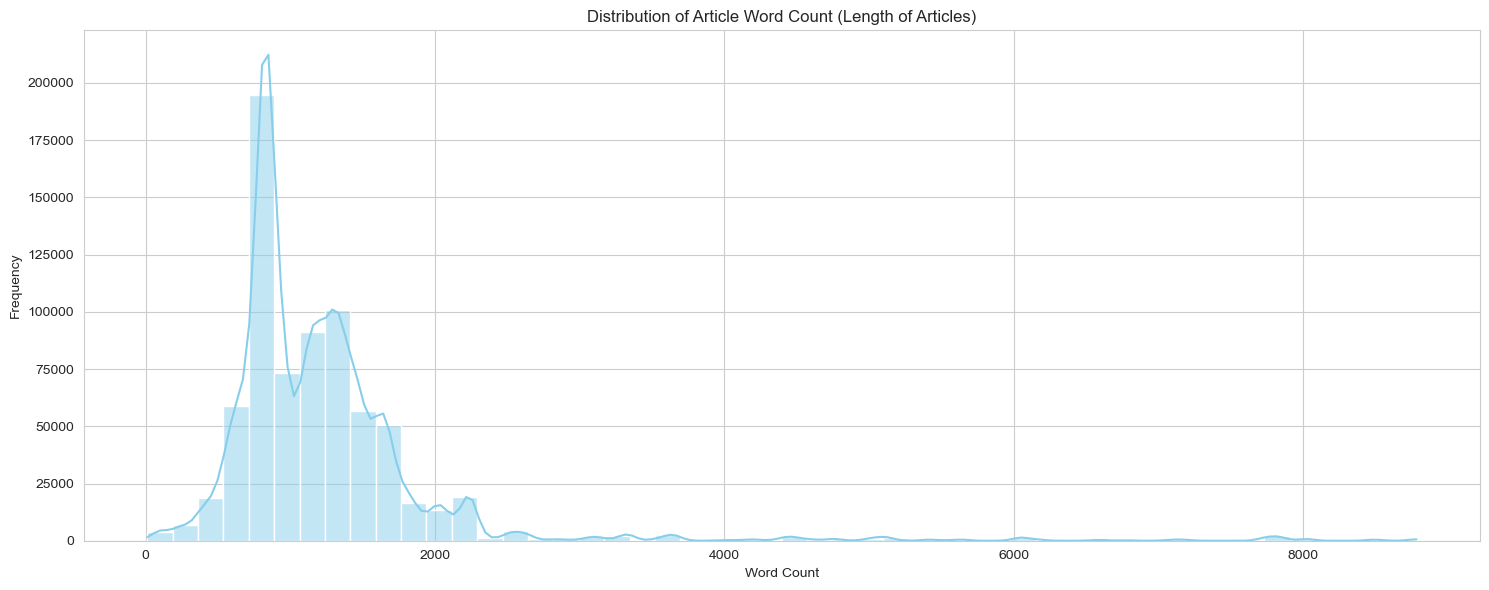

In [222]:

plt.figure(figsize=(15, 6))
sns.histplot(data=dfGraph, x='articleWordCount_x', bins=50, kde=True, color='skyblue')
plt.title('Distribution of Article Word Count (Length of Articles)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


### Average recommendations per documentType 

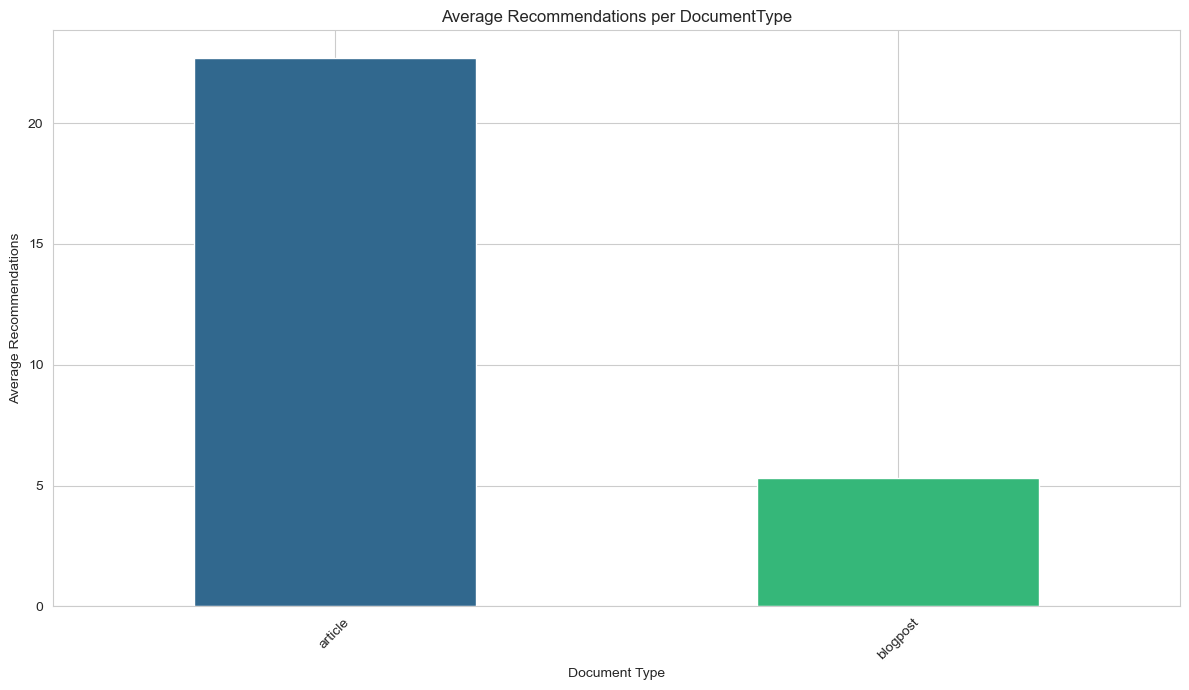

In [223]:
# Calculate and plot the average number of recommendations per document type in `dfGraph`, sorted in descending order, using a bar chart with a "viridis" color palette adjusted to the number of document types.

avg_recommendations = dfGraph.groupby('documentType')['recommendations'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
avg_recommendations.plot(kind='bar', color=sns.color_palette("viridis", len(avg_recommendations)))
plt.title('Average Recommendations per DocumentType')
plt.xlabel('Document Type')
plt.ylabel('Average Recommendations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Distribution of typeOfMaterial 

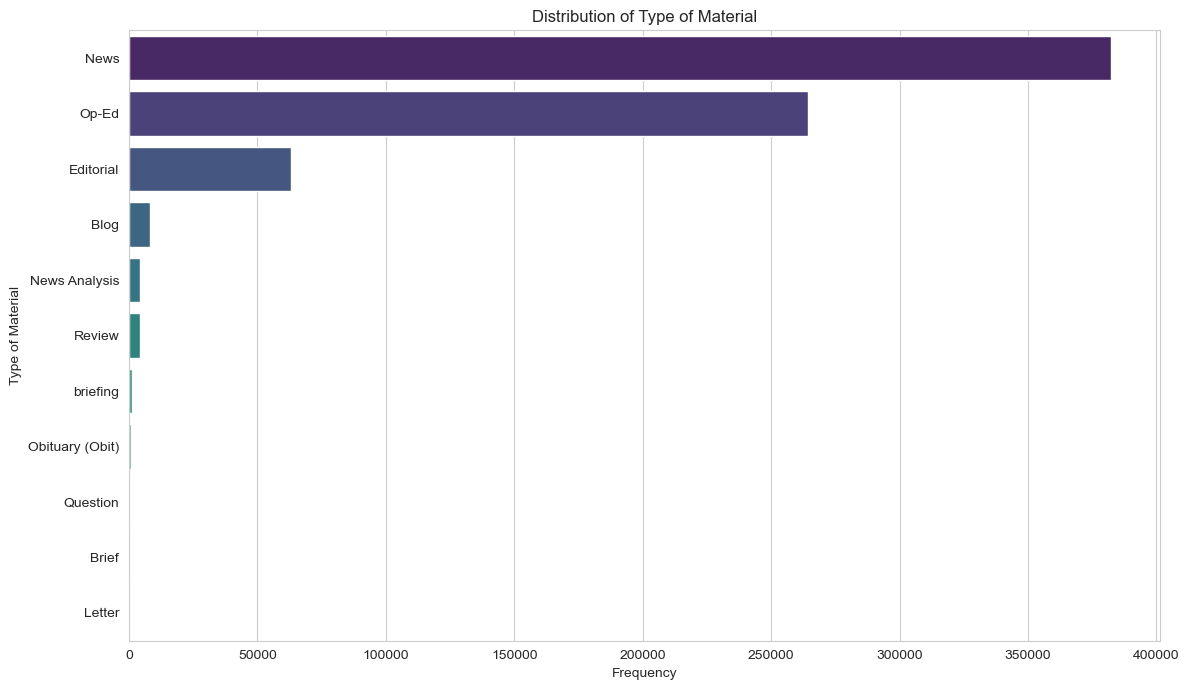

In [224]:
plt.figure(figsize=(12, 7))
sns.countplot(data=dfGraph, y='typeOfMaterial_x', order=dfGraph['typeOfMaterial_x'].value_counts().index, palette="viridis")
plt.title('Distribution of Type of Material')
plt.xlabel('Frequency')
plt.ylabel('Type of Material')
plt.tight_layout()
plt.show()


### Analysis of the Most Discussed Topics over Time 

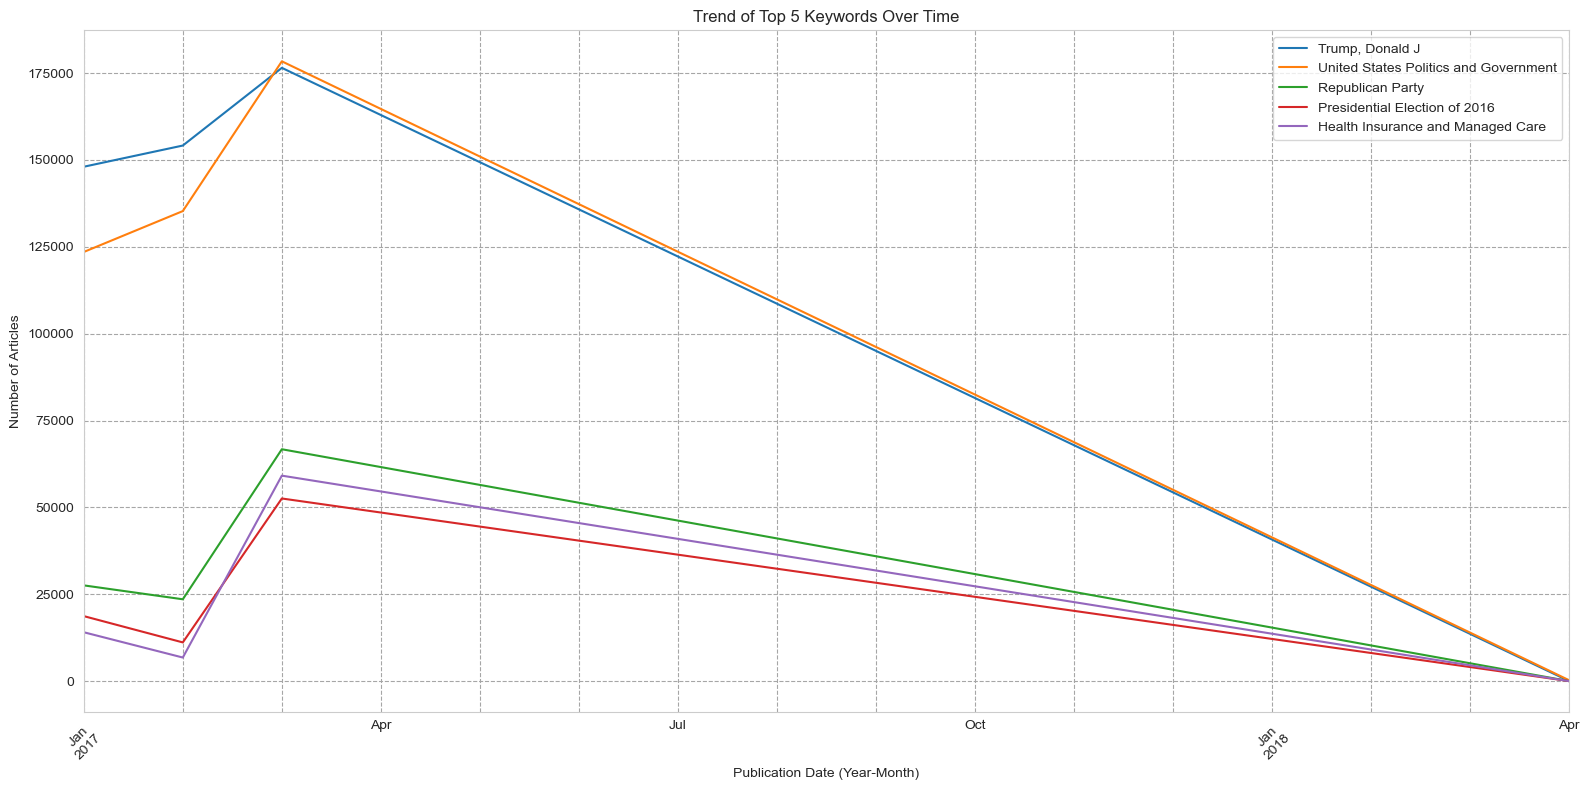

In [225]:
# Explode 'keywords2' in `dfGraph` to individual rows, identify the top 5 keywords, and plot their trends over time by grouping the data by 'Year_Month' and 'keywords2', resulting in a time series for each of the top keywords with custom styling and layout adjustments.

keywords_df = dfGraph.explode('keywords2')

top_keywords = keywords_df['keywords2'].value_counts().head(5).index

top_keywords_df = keywords_df[keywords_df['keywords2'].isin(top_keywords)]

keyword_trends = top_keywords_df.groupby(['Year_Month', 'keywords2']).size().unstack().fillna(0)


plt.figure(figsize=(16, 8))
for keyword in top_keywords:
    keyword_trends[keyword].plot(label=keyword)

plt.title('Trend of Top 5 Keywords Over Time')
plt.xlabel('Publication Date (Year-Month)')
plt.ylabel('Number of Articles')
plt.legend()
plt.grid(True, which="both", ls="--", c='0.65')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### User Engagement Analysis 

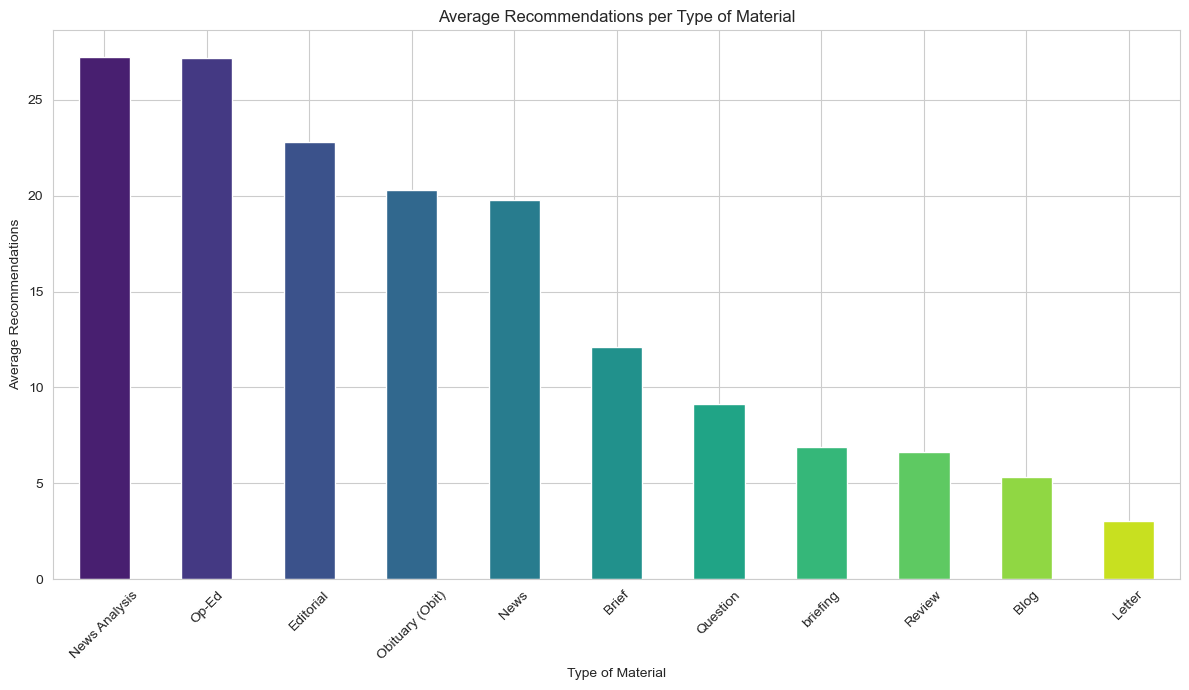

In [226]:
# Group `dfGraph` by 'typeOfMaterial_x', calculate the average recommendations for each type, and plot these averages in descending order as a bar chart, using a "viridis" color palette to visually differentiate each material type.

avg_recommendations_by_type = dfGraph.groupby('typeOfMaterial_x')['recommendations'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
avg_recommendations_by_type.plot(kind='bar', color=sns.color_palette("viridis", len(avg_recommendations_by_type)))
plt.title('Average Recommendations per Type of Material')
plt.xlabel('Type of Material')
plt.ylabel('Average Recommendations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Average comment length per article 

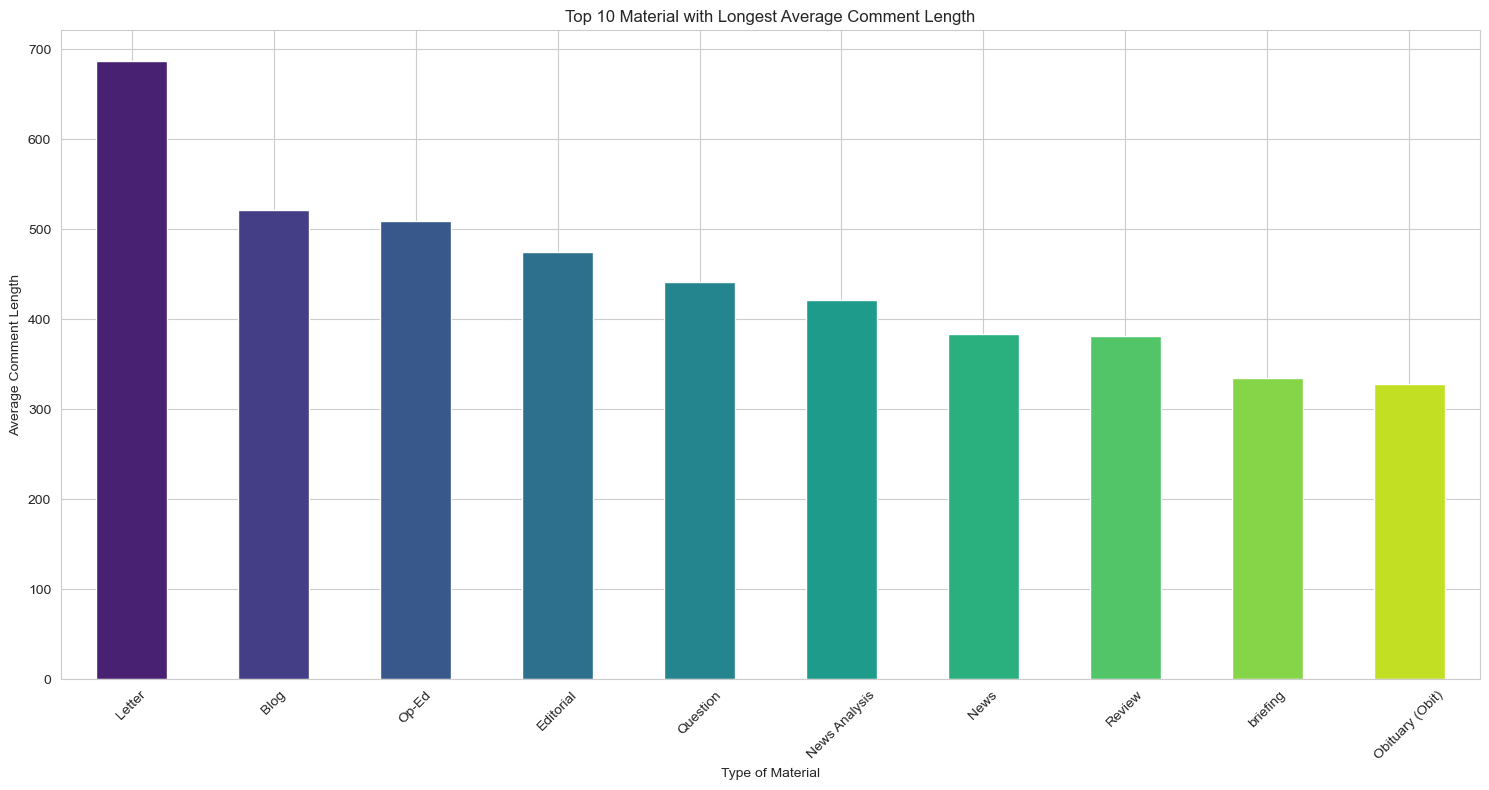

In [227]:
# Calculate comment lengths in `dfGraph`, then determine and plot the average length for the top 10 types of material, showcasing those with the longest comments in a visually distinct bar chart using the "viridis" palette.

dfGraph['commentLength'] = dfGraph['commentBody'].str.len()

avg_comment_length_article = dfGraph.groupby('typeOfMaterial_x')['commentLength'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(15, 8))
avg_comment_length_article.plot(kind='bar', color=sns.color_palette("viridis", 10))
plt.title('Top 10 Material with Longest Average Comment Length')
plt.xlabel('Type of Material')
plt.ylabel('Average Comment Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Average comment length per user 

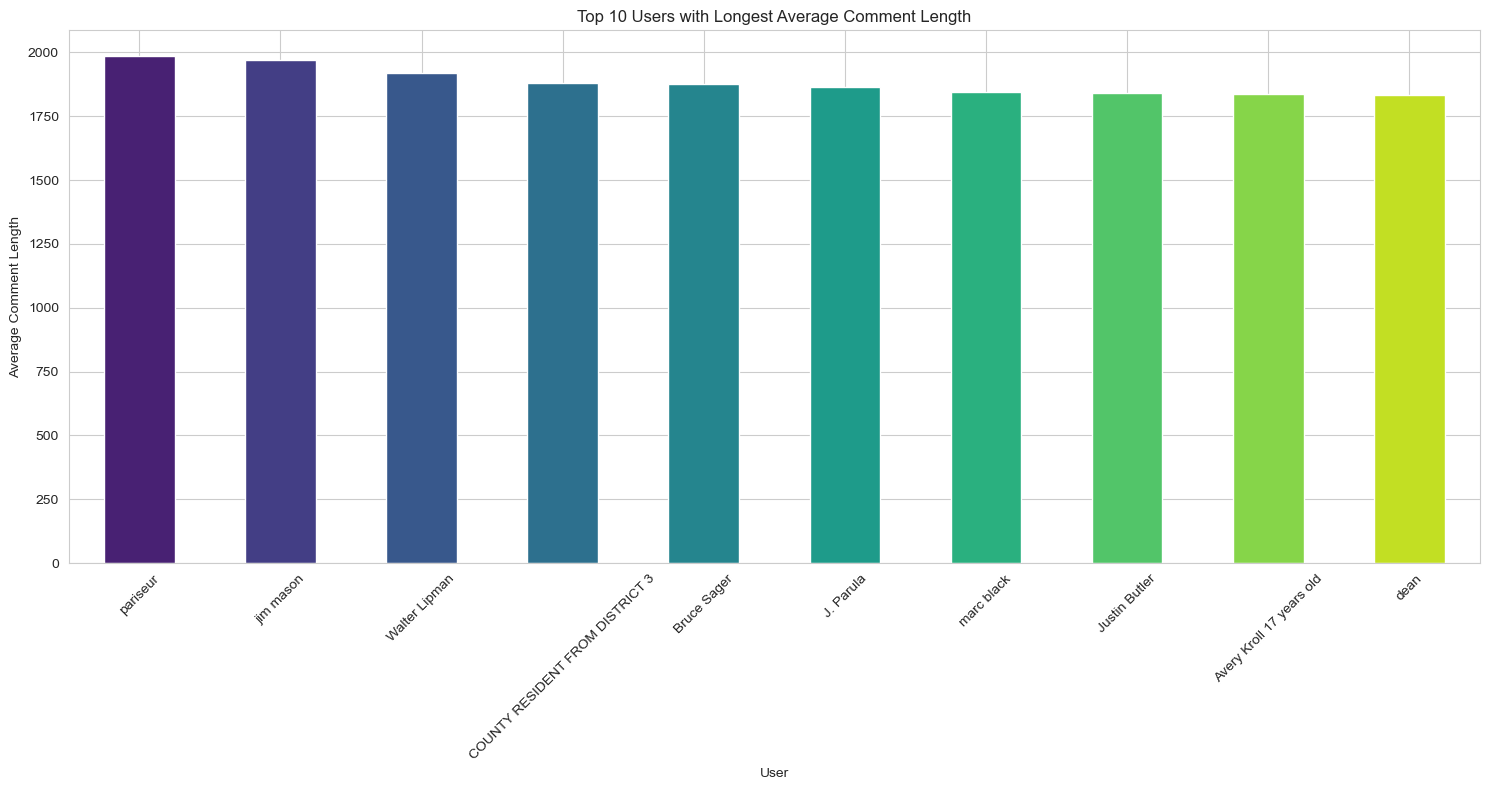

In [228]:
# Group `dfGraph` by 'userDisplayName' to calculate and visualize the top 10 users by their average comment length, using a bar chart with a "viridis" color scheme for easy comparison and distinction.

avg_comment_length_user = dfGraph.groupby('userDisplayName')['commentLength'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(15, 8))
avg_comment_length_user.plot(kind='bar', color=sns.color_palette("viridis", 10))
plt.title('Top 10 Users with Longest Average Comment Length')
plt.xlabel('User')
plt.ylabel('Average Comment Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Data Preprocessing

In [229]:
# Merge `df1` and `df10` on 'articleID' using an outer join to include all records, then drop specific columns from the merge that are redundant or not needed. Further refine the DataFrame by removing additional columns related to article metadata and user information, leaving a streamlined set of columns in `df`.

merged = pd.merge(df1, df10, on='articleID', how='outer', indicator=False)

merged.drop(columns=['articleWordCount_y','newDesk_y','printPage_y','sectionName_y','typeOfMaterial_y'],inplace=True, axis=1)

df = merged.drop(columns=['abstract','parentUserDisplayName','reportAbuseFlag','recommendedFlag','userTitle','userURL'],axis=1)

df.columns



Index(['articleID', 'byline', 'documentType', 'headline', 'keywords',
       'multimedia', 'newDesk_x', 'printPage_x', 'pubDate', 'sectionName_x',
       'snippet', 'source', 'typeOfMaterial_x', 'webURL', 'articleWordCount_x',
       'approveDate', 'commentBody', 'commentID', 'commentSequence',
       'commentTitle', 'commentType', 'createDate', 'depth',
       'editorsSelection', 'inReplyTo', 'parentID', 'permID', 'picURL',
       'recommendations', 'replyCount', 'sharing', 'status', 'timespeople',
       'trusted', 'updateDate', 'userDisplayName', 'userID', 'userLocation'],
      dtype='object')

In [ ]:
# Add a new column 'commentLength' to `df` by calculating the length of each comment in 'commentBody', effectively quantifying the length of user comments.

df['commentLength'] = df['commentBody'].str.len()

In [31]:
df.isnull().sum()

articleID                   0
byline                      0
documentType                0
headline                    0
keywords                    0
multimedia                  0
newDesk_x                   0
printPage_x                 0
pubDate                     0
sectionName_x               0
snippet                     0
source                      0
typeOfMaterial_x            0
webURL                      0
articleWordCount_x          0
approveDate                 0
commentBody                 0
commentID                   0
commentSequence             0
commentTitle            13407
commentType                 0
createDate                  0
depth                       0
editorsSelection            0
inReplyTo                   0
parentID                    0
permID                      0
picURL                      0
recommendations             0
replyCount                  0
sharing                     0
status                      0
timespeople                 0
trusted   

In [230]:
# Dropping unnecessary columns
df.drop(columns=['commentTitle', 'userLocation', 'userDisplayName','status',
                 'picURL','permID','parentID','inReplyTo','editorsSelection','commentSequence','approveDate'
                ,'webURL','documentType','updateDate'], inplace=True, axis=1)

In [232]:
# Extracting Average Comment Hour

df['pubDate'] = pd.to_datetime(df['pubDate'])
df['commentHour'] = df['pubDate'].dt.hour
avg_comment_hour = df.groupby('userID')['commentHour'].mean()



user_history_features = pd.DataFrame({
    'AvgCommentHour': avg_comment_hour,
}).reset_index()



In [233]:
df = pd.merge(df, user_history_features, on='userID', how='outer', indicator=False)
df.head(2)

,articleID,byline,headline,keywords,multimedia,newDesk_x,printPage_x,pubDate,sectionName_x,snippet,...,createDate,depth,recommendations,replyCount,sharing,timespeople,trusted,userID,commentHour,AvgCommentHour
0,58691a5795d0e039260788b9,By JENNIFER STEINHAUER,G.O.P. Leadership Poised to Topple Obama’s Pi...,"['United States Politics and Government', 'Law...",1,National,1,2017-01-01 15:03:38,Politics,The most powerful and ambitious Republican-led...,...,1483426105,1.0,5,0,0,1,0,64679318.0,15,10.893162
1,58691a5795d0e039260788b9,By JENNIFER STEINHAUER,G.O.P. Leadership Poised to Topple Obama’s Pi...,"['United States Politics and Government', 'Law...",1,National,1,2017-01-01 15:03:38,Politics,The most powerful and ambitious Republican-led...,...,1483397227,1.0,11,1,0,1,0,64679318.0,15,10.893162


In [35]:
# Creating Columns of Polarity (Comment and Snippet of Article)

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity'] = df['commentBody'].apply(get_polarity)
df['polarity_snippet'] = df['snippet'].apply(get_polarity)



In [36]:
# Calculating Engagement Rate


weights = {
    'commentLength': 0.5,
    'sharing': 0.125,
    'replyCount': 0.125,
    'depth': 0.125,
}

# Calculate the weighted scores
weighted_scores = df[list(weights.keys())].multiply(list(weights.values()), axis=1)
df['engagement_rate'] = weighted_scores.sum(axis=1)


In [37]:
# Engagement for Each User and specific article

engagement = df.groupby(['articleID','userID'])['engagement_rate'].mean()
eng = pd.DataFrame({'engagment':engagement}).reset_index()

# Polarity
comment_p = df.groupby(['articleID','userID'])['polarity'].mean()
polarity = pd.DataFrame({'polarity_comment':comment_p}).reset_index()

In [38]:
df = pd.merge(df, eng, on=['articleID','userID'], how='inner', indicator=False)
df = pd.merge(df, polarity, on=['articleID','userID'], how='inner', indicator=False)
df.head(2)

,articleID,byline,headline,keywords,multimedia,newDesk_x,printPage_x,pubDate,sectionName_x,snippet,...,commentLength,primaryTopic,commentHour,FrequentTopic,AvgCommentHour,polarity,polarity_snippet,engagement_rate,engagment,polarity_comment
0,58691a5795d0e039260788b9,By JENNIFER STEINHAUER,G.O.P. Leadership Poised to Topple Obama’s Pi...,"['United States Politics and Government', 'Law...",1,National,1,2017-01-01 15:03:38,Politics,The most powerful and ambitious Republican-led...,...,738,United States Politics and Government,15,"Trump, Donald J",10.893162,0.362500,0.260417,369.125,144.335938,0.106218
1,58691a5795d0e039260788b9,By JENNIFER STEINHAUER,G.O.P. Leadership Poised to Topple Obama’s Pi...,"['United States Politics and Government', 'Law...",1,National,1,2017-01-01 15:03:38,Politics,The most powerful and ambitious Republican-led...,...,552,United States Politics and Government,15,"Trump, Donald J",10.893162,0.314286,0.260417,276.250,144.335938,0.106218


In [39]:
df.columns

Index(['articleID', 'byline', 'headline', 'keywords', 'multimedia',
       'newDesk_x', 'printPage_x', 'pubDate', 'sectionName_x', 'snippet',
       'source', 'typeOfMaterial_x', 'articleWordCount_x', 'commentBody',
       'commentID', 'commentType', 'createDate', 'depth', 'recommendations',
       'replyCount', 'sharing', 'timespeople', 'trusted', 'userID',
       'commentLength', 'primaryTopic', 'commentHour', 'FrequentTopic',
       'AvgCommentHour', 'polarity', 'polarity_snippet', 'engagement_rate',
       'engagment', 'polarity_comment'],
      dtype='object')

In [40]:
df.drop(columns=['commentBody','polarity','commentType','commentID','createDate','commentLength',
                'sharing','replyCount','depth','recommendations','trusted','engagement_rate'],inplace=True,axis=1)

In [41]:
df.shape

(231449, 22)

In [42]:
# Duplicated

df = df.drop_duplicates()

In [43]:
df.shape

(187940, 22)

In [44]:
# Feature Engineering

In [45]:
# Function for Cleaning Text

def clean_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation
    #text = text.translate(str.maketrans('', '', string.punctuation))
    
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))
    
    
    # Tokenization
    words = word_tokenize(text)
    
    
    # Removing stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_output = ' '.join([lemmatizer.lemmatize(word) for word in words])
    
    return lemmatized_output.strip()

# Apply the preprocessing function to the 'snippet' column
df['snippet'] = df['snippet'].apply(clean_text)


# Apply the cleaning function to the headline column
df['headline'] = df['headline'].apply(clean_text)


# Keywords
def pre(text):
    keywords_list = ast.literal_eval(text)
    joined_text = ' '.join(keywords_list)
    return joined_text

df['keywords'] = df['keywords'].apply(pre)
df['keywords'] = df['keywords'].apply(clean_text)


df['byline'] = df['byline'].str.replace(r'^By\s+', '', case=False, regex=True)

In [46]:
# Train/Validation/Test split


X = df.drop(columns=['engagment'])
y = df['engagment'].reset_index(drop=True)


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=43)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=43)

In [143]:
'''

# TF-IDF Snippet Columns

tfidf_vectorizer = TfidfVectorizer(max_features=500)

tfidf_matrix1 = tfidf_vectorizer.fit_transform(X_train['snippet'])
tfidf_matrix2 = tfidf_vectorizer.transform(X_val['snippet'])
tfidf_matrix3 = tfidf_vectorizer.transform(X_test['snippet'])


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

snip_train = pd.DataFrame(tfidf_matrix1.toarray(), columns=tfidf_feature_names)
snip_val = pd.DataFrame(tfidf_matrix2.toarray(), columns=tfidf_feature_names)
snip_test = pd.DataFrame(tfidf_matrix3.toarray(), columns=tfidf_feature_names) '''


# Glovo Tokenizer:
'''

import numpy as np
import pandas as pd

# Function to load GloVe vectors from a file
def load_glove_model(glove_file_path):
    print("Loading Glove Model")
    glove_model = {}
    with open(glove_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array([float(val) for val in split_line[1:]])
            glove_model[word] = embedding
    print(f"{len(glove_model)} words loaded!")
    return glove_model

# Function to create a vector for a document by averaging its word vectors
def document_vector_glove(doc, glove, vector_size):
    doc = [word for word in doc if word in glove]
    if len(doc) == 0:
        return np.zeros(vector_size)
    return np.mean([glove[word] for word in doc], axis=0)

# Vector size for GloVe vectors, e.g., 50, 100, 200, 300
vector_size = 300

# Replace this with the actual path to your GloVe file
glove_file_path = 'glove.6B.300d.txt'

# Load the GloVe vectors into a dictionary
glove_model = load_glove_model(glove_file_path)

# Assume X_train, X_val, X_test are pandas DataFrames with a column 'snippet' containing text data
# Create document vectors for each snippet in the training, validation, and test set using the GloVe vectors
snip_train = pd.DataFrame(X_train['snippet'].apply(lambda doc: document_vector_glove(doc, glove_model, vector_size)).tolist(), index=X_train.index)
snip_val = pd.DataFrame(X_val['snippet'].apply(lambda doc: document_vector_glove(doc, glove_model, vector_size)).tolist(), index=X_val.index) 
snip_test = pd.DataFrame(X_test['snippet'].apply(lambda doc: document_vector_glove(doc, glove_model, vector_size)).tolist(), index=X_test.index)

'''


# Word2Vec



model = Word2Vec(sentences=X_train['snippet'], vector_size=300, window=5, min_count=1, workers=4)

# Function to create a vector for a document by averaging its word vectors
def document_vector(doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in model.wv]
    if len(doc) == 0:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[doc], axis=0)

# Create document vectors for each snippet in the training, validation, and test set
snip_train = pd.DataFrame(X_train['snippet'].apply(document_vector).tolist(), index=X_train.index)
snip_val = pd.DataFrame(X_val['snippet'].apply(document_vector).tolist(), index=X_val.index) 
snip_test = pd.DataFrame(X_test['snippet'].apply(document_vector).tolist(), index=X_test.index)









In [144]:
# TF-IDF Headline Columns

'''

tfidf_vectorizer = TfidfVectorizer(max_features=500)

tfidf_matrix1 = tfidf_vectorizer.fit_transform(X_train['headline'])
tfidf_matrix2 = tfidf_vectorizer.transform(X_val['headline'])
tfidf_matrix3 = tfidf_vectorizer.transform(X_test['headline'])



tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

headline_train = pd.DataFrame(tfidf_matrix1.toarray(), columns=tfidf_feature_names)
headline_val = pd.DataFrame(tfidf_matrix2.toarray(), columns=tfidf_feature_names)
headline_test = pd.DataFrame(tfidf_matrix3.toarray(), columns=tfidf_feature_names)   '''


# Glovo
'''
# Create document vectors for the 'additional_text' column in the training, validation, and test set
headline_train = pd.DataFrame(X_train['headline'].apply(lambda doc: document_vector_glove(doc, glove_model, vector_size)).tolist(), index=X_train.index)
headline_val = pd.DataFrame(X_val['headline'].apply(lambda doc: document_vector_glove(doc, glove_model, vector_size)).tolist(), index=X_val.index) 
headline_test = pd.DataFrame(X_test['headline'].apply(lambda doc: document_vector_glove(doc, glove_model, vector_size)).tolist(), index=X_test.index)
'''



# Word2Vec




model = Word2Vec(sentences=X_train['headline'], vector_size=300, window=5, min_count=1, workers=4)

# Function to create a vector for a document by averaging its word vectors
def document_vector(doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in model.wv]
    if len(doc) == 0:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[doc], axis=0)

# Create document vectors for each snippet in the training, validation, and test set
headline_train = pd.DataFrame(X_train['headline'].apply(document_vector).tolist(), index=X_train.index)
headline_val = pd.DataFrame(X_val['headline'].apply(document_vector).tolist(), index=X_val.index)
headline_test = pd.DataFrame(X_test['headline'].apply(document_vector).tolist(), index=X_test.index)








In [145]:
# TF-IDF Keywords Columns


'''
tfidf_vectorizer = TfidfVectorizer(max_features=500)

tfidf_matrix1 = tfidf_vectorizer.fit_transform(X_train['keywords'])
tfidf_matrix2 = tfidf_vectorizer.transform(X_val['keywords'])
tfidf_matrix3 = tfidf_vectorizer.transform(X_test['keywords'])


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

key_train = pd.DataFrame(tfidf_matrix1.toarray(), columns=tfidf_feature_names)
key_val = pd.DataFrame(tfidf_matrix2.toarray(), columns=tfidf_feature_names)
key_test = pd.DataFrame(tfidf_matrix3.toarray(), columns=tfidf_feature_names) '''


# GLOVo
'''
key_train = pd.DataFrame(X_train['keywords'].apply(lambda doc: document_vector_glove(doc, glove_model, vector_size)).tolist(), index=X_train.index)
key_val = pd.DataFrame(X_val['keywords'].apply(lambda doc: document_vector_glove(doc, glove_model, vector_size)).tolist(), index=X_val.index) 
key_test = pd.DataFrame(X_test['keywords'].apply(lambda doc: document_vector_glove(doc, glove_model, vector_size)).tolist(), index=X_test.index)
'''



# Word2Vec




model = Word2Vec(sentences=X_train['keywords'], vector_size=300, window=5, min_count=1, workers=4)

# Function to create a vector for a document by averaging its word vectors
def document_vector(doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in model.wv]
    if len(doc) == 0:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[doc], axis=0)

# Create document vectors for each snippet in the training, validation, and test set
key_train = pd.DataFrame(X_train['keywords'].apply(document_vector).tolist(), index=X_train.index)
key_val = pd.DataFrame(X_val['keywords'].apply(document_vector).tolist(), index=X_val.index)
key_test = pd.DataFrame(X_test['keywords'].apply(document_vector).tolist(), index=X_test.index)





In [128]:
# Encoding categorical columns into Binary


encoder = BinaryEncoder(cols=['byline','newDesk_x','sectionName_x', 'source', 'typeOfMaterial_x'])

encoded_train = encoder.fit_transform(X_train[['byline','newDesk_x','sectionName_x', 'source', 'typeOfMaterial_x']])
encoded_val = encoder.transform(X_val[['byline','newDesk_x','sectionName_x', 'source', 'typeOfMaterial_x']])
encoded_test = encoder.transform(X_test[['byline','newDesk_x','sectionName_x', 'source', 'typeOfMaterial_x']])



In [146]:
# Dimensionality Reduction

# Combining all TF-IDF generated
df_train = pd.concat([headline_train,key_train,snip_train], axis=1)
df_val = pd.concat([headline_val,key_val,snip_val], axis=1)
df_test = pd.concat([headline_test,key_test,snip_test], axis=1)

# Convert the DataFrame to a sparse matrix
sparse_matrix1 = csr_matrix(df_train.values)
sparse_matrix2 = csr_matrix(df_val.values)
sparse_matrix3 = csr_matrix(df_test.values)


# Initialize Truncated SVD
svd = TruncatedSVD(n_components=10)  # Adjust n_components to your needs

# Fit and transform the data
train_d = svd.fit_transform(sparse_matrix1)
val_d = svd.transform(sparse_matrix2)
test_d = svd.transform(sparse_matrix3)




In [147]:


#from sklearn.decomposition import PCA
# Create PCA object. n_components can be an integer or a float between 0 and 1 to explain that fraction of variance
pca = PCA(n_components=0.90)

# Fit PCA on standardized data
pca_train = pca.fit_transform(train_d)
pca_val = pca.transform(val_d)
pca_test = pca.transform(test_d)


In [73]:
print("Original number of features:", train_d.shape[1])
print("Reduced number of features:", pca_train.shape[1])

Original number of features: 10
Reduced number of features: 8


In [158]:
# Combining sparse and dense features

dense_train= X_train[['multimedia','printPage_x','articleWordCount_x','AvgCommentHour',
    'polarity_snippet','polarity_comment']].reset_index(drop=True)
dense_val= X_val[['multimedia','printPage_x','articleWordCount_x','AvgCommentHour',
    'polarity_snippet','polarity_comment']].reset_index(drop=True)
dense_test= X_test[['multimedia','printPage_x','articleWordCount_x','AvgCommentHour',
    'polarity_snippet','polarity_comment']].reset_index(drop=True)


# Standardization

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(dense_train)
X_val_standardized = scaler.transform(dense_val)
X_test_standardized = scaler.transform(dense_test)

# Convert the NumPy arrays returned by the scaler back to pandas DataFrames
X_train_standardized_df = pd.DataFrame(X_train_standardized, columns=dense_train.columns)
X_val_standardized_df = pd.DataFrame(X_val_standardized, columns=dense_val.columns)
X_test_standardized_df = pd.DataFrame(X_test_standardized, columns=dense_test.columns)

# Now you can concatenate using `pd.concat`
combined1 = pd.concat([encoded_train.reset_index(drop=True), X_train_standardized_df], axis=1)
combined2 = pd.concat([encoded_val.reset_index(drop=True), X_val_standardized_df], axis=1)
combined3 = pd.concat([encoded_test.reset_index(drop=True), X_test_standardized_df], axis=1)


# Convert the dense features to a sparse format
dense_sparse1 = csr_matrix(combined1)    
dense_sparse2 = csr_matrix(combined2)     
dense_sparse3 = csr_matrix(combined3)    

# Concatenate the transformed sparse features with the dense features (now also sparse)
train_X = hstack([csr_matrix(train_d), dense_sparse1])    
val_x = hstack([csr_matrix(val_d), dense_sparse2])       
test_x = hstack([csr_matrix(test_d), dense_sparse3])     


In [180]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your target data and transform it
y_train_s = scaler.fit_transform(y_train[:, None])
y_val_s = scaler.transform(y_val[:, None])
y_test_s = scaler.transform(y_test[:, None])



# Models

In [56]:
# Baseline Model



mean_target = np.mean(y_train_s)

baseline_predictions = np.full(shape=y_val_s.shape, fill_value=mean_target)

# Calculate the MSE of the baseline predictions
baseline_mse = mean_squared_error(y_val_s, baseline_predictions)

print("Baseline MSE:", baseline_mse)

Baseline MSE: 0.03422904657706901


In [181]:
# Linear Regression Model 1


# Train the regression model
regression_model = LinearRegression()
regression_model.fit(train_X, y_train_s)

# Make predictions on the validation set
y_pred = regression_model.predict(val_x)


# Evaluate and display the model's performance using a regression metric

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val_s, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_val_s, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared (R2)
r2 = r2_score(y_val_s, y_pred)
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.14131655144312058
Mean Squared Error (MSE): 0.03317644992158373
Root Mean Squared Error (RMSE): 0.18214403619548933
R-squared (R2): 0.030600834482797934


In [179]:
# Cross-Validation for Linear Regression

regression_model2 = LinearRegression()
scores = cross_val_score(regression_model2, train_X, y_train_s, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive values because MSE is supposed to be minimized, 
# and cross_val_score returns the negative value for it
mse_scores = -scores

print("Cross-validation MSE scores:", mse_scores)

mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print('Mean MSE:', mean_mse)
print('Standard Deviation of MSE:', std_mse)

rmse_scores = np.sqrt(mse_scores)
mean_rmse = rmse_scores.mean()
std_rmse = rmse_scores.std()

print('Mean RMSE:', mean_rmse)
print('Standard Deviation of RMSE:', std_rmse)

Cross-validation MSE scores: [0.03369283 0.03378097 0.03424263 0.03485176 0.03388293]
Mean MSE: 0.03409022376327775
Standard Deviation of MSE: 0.0004241907563055569
Mean RMSE: 0.1846318267773916
Standard Deviation of RMSE: 0.0011455584319571604


In [182]:
# Hyperparameter Tuning for Ridge Regression Model 2



# Create a Ridge regression model
ridge_model = Ridge(random_state=42)

# Define a grid of alpha values for hyperparameter tuning
param_grid = {
    'alpha': [1e-3, 1e-2, 1e-1, 1, 10, 100]
}

# Setup the grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search on the training data
grid_search.fit(train_X, y_train_s)

# The best hyperparameter value of alpha
best_alpha = grid_search.best_params_['alpha']

# Train the model with the best alpha
best_ridge_model = Ridge(alpha=best_alpha, random_state=42)
best_ridge_model.fit(train_X, y_train_s)

# Make predictions and evaluate the model
y_pred = best_ridge_model.predict(val_x)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val_s, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_val_s, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared (R2)
r2 = r2_score(y_val_s, y_pred)
print(f"R-squared (R2): {r2}")

print('Best Alpha: ', best_alpha)


Mean Absolute Error (MAE): 0.14131877518067681
Mean Squared Error (MSE): 0.0331752567090597
Root Mean Squared Error (RMSE): 0.1821407607018805
R-squared (R2): 0.030635699552081008
Best Alpha:  100


In [171]:
# Cross Validation for Ridge Regression

ridge_model = Ridge(alpha=100, random_state=42)
scores = cross_val_score(ridge_model, train_X, y_train_s, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive values because MSE is supposed to be minimized, 
# and cross_val_score returns the negative value for it
mse_scores = -scores

print("Cross-validation MSE scores:", mse_scores)

mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print('Mean MSE:', mean_mse)
print('Standard Deviation of MSE:', std_mse)

rmse_scores = np.sqrt(mse_scores)
mean_rmse = rmse_scores.mean()
std_rmse = rmse_scores.std()

print('Mean RMSE:', mean_rmse)
print('Standard Deviation of RMSE:', std_rmse)

Cross-validation MSE scores: [0.03369201 0.03378086 0.03424427 0.03485175 0.03388186]
Mean MSE: 0.03409014778194535
Standard Deviation of MSE: 0.0004245812569252899
Mean RMSE: 0.1846316144072183
Standard Deviation of RMSE: 0.0011466225750459296


In [161]:
# Hyperparameter Tuning for Elastic Net Regression Model 3


# Create an ElasticNet regression model
elastic_net_model = ElasticNet(random_state=42)

# Define a grid of alpha values and l1_ratio values for hyperparameter tuning
param_grid = {
    'alpha': [1e-3, 1e-2, 1e-1, 1, 10, 100],
    'l1_ratio': np.linspace(0.01, 1.0, 10)  
}

# Setup the grid search with 5-fold cross-validation
grid_search_elastic = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search on the training data
grid_search_elastic.fit(train_X, y_train_s)

# The best hyperparameter values
best_alpha_elastic = grid_search_elastic.best_params_['alpha']
best_l1_ratio = grid_search_elastic.best_params_['l1_ratio']

# Train the model with the best parameters
best_elastic_model = ElasticNet(alpha=best_alpha_elastic, l1_ratio=best_l1_ratio, random_state=42)
best_elastic_model.fit(train_X, y_train_s)

y_pred = best_elastic_model.predict(val_x)

# Make predictions and evaluate the model
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val_s, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_val_s, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared (R2)
r2 = r2_score(y_val_s, y_pred)
print(f"R-squared (R2): {r2}")

best_alpha_elastic, best_l1_ratio


Mean Absolute Error (MAE): 0.1413211635298035
Mean Squared Error (MSE): 0.03317387897069658
Root Mean Squared Error (RMSE): 0.1821369785922029
R-squared (R2): 0.030675956373490854


(0.001, 0.01)

In [172]:
# Cross Validation for Elastic Net Regression

elastic_model = ElasticNet(alpha=0.001, l1_ratio=0.01, random_state=42)
scores = cross_val_score(elastic_model, train_X, y_train_s, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive values because MSE is supposed to be minimized, 
# and cross_val_score returns the negative value for it
mse_scores = -scores

print("Cross-validation MSE scores:", mse_scores)

mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print('Mean MSE:', mean_mse)
print('Standard Deviation of MSE:', std_mse)

rmse_scores = np.sqrt(mse_scores)
mean_rmse = rmse_scores.mean()
std_rmse = rmse_scores.std()

print('Mean RMSE:', mean_rmse)
print('Standard Deviation of RMSE:', std_rmse)


Cross-validation MSE scores: [0.03369164 0.03378049 0.0342462  0.03485205 0.03388131]
Mean MSE: 0.034090337685301356
Standard Deviation of MSE: 0.00042500727600230297
Mean RMSE: 0.184632121502747
Standard Deviation of RMSE: 0.0011477781563631465


In [163]:
# Hyperparameter Tuning for SGD Regressor Model 4


# Reduce the hyperparameter space
param_grid_sgd_reduced = {
    'alpha': [1e-4, 1e-3, 1e-2],  
    'l1_ratio': [0.15, 0.5, 0.85],  
    'penalty': ['l2', 'l1', 'elasticnet'],  
}

# Setup the grid search with fewer parameters and 5-fold cross-validation
grid_search_sgd_reduced = GridSearchCV(estimator=sgd_regressor, param_grid=param_grid_sgd_reduced, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search on the training data
grid_search_sgd_reduced.fit(train_X, y_train_s)

# The best hyperparameters
best_params_sgd_reduced = grid_search_sgd_reduced.best_params_

# Train the model with the best parameters
best_sgd_regressor_reduced = SGDRegressor(random_state=42,
                                          max_iter=1000,
                                          tol=1e-3,
                                          alpha=best_params_sgd_reduced['alpha'],
                                          l1_ratio=best_params_sgd_reduced['l1_ratio'],
                                          penalty=best_params_sgd_reduced['penalty'])
best_sgd_regressor_reduced.fit(train_X, y_train_s)

# Make predictions and evaluate the model
y_pred = best_sgd_regressor_reduced.predict(val_x)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val_s, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_val_s, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared (R2)
r2 = r2_score(y_val_s, y_pred)
print(f"R-squared (R2): {r2}")

best_params_sgd_reduced


Mean Absolute Error (MAE): 0.14218661784982625
Mean Squared Error (MSE): 0.03330335844096654
Root Mean Squared Error (RMSE): 0.1824920777485054
R-squared (R2): 0.02689263143281828


{'alpha': 0.0001, 'l1_ratio': 0.15, 'penalty': 'elasticnet'}

In [173]:
# Cross Validation for SGD Regressor


regressor_SGD = SGDRegressor(random_state=42,
                                          max_iter=1000,
                                          tol=1e-3,
                                          alpha=0.0001,
                                          l1_ratio=0.15,
                                          penalty='elasticnet')

scores = cross_val_score(regressor_SGD, train_X, y_train_s, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive values because MSE is supposed to be minimized, 
# and cross_val_score returns the negative value for it
mse_scores = -scores

print("Cross-validation MSE scores:", mse_scores)

mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print('Mean MSE:', mean_mse)
print('Standard Deviation of MSE:', std_mse)

rmse_scores = np.sqrt(mse_scores)
mean_rmse = rmse_scores.mean()
std_rmse = rmse_scores.std()

print('Mean RMSE:', mean_rmse)
print('Standard Deviation of RMSE:', std_rmse)

Cross-validation MSE scores: [0.03385413 0.03390526 0.03429964 0.03500758 0.03405968]
Mean MSE: 0.03422525945804981
Standard Deviation of MSE: 0.0004207414415816008
Mean RMSE: 0.18499722857303005
Standard Deviation of RMSE: 0.0011335247451574912


In [165]:
# Hyperparameter Tuning for Decision Tree Model 5


# Reduced hyperparameter grid
param_grid_reduced = {
    'max_depth': [None, 5, 10],  
    'min_samples_split': [2, 5], 
    'min_samples_leaf': [1, 2],   
    'max_features': [None, 'auto'] 
}

# Initialize the decision tree regressor
dtr = DecisionTreeRegressor(random_state=42)

# Setup the grid search with fewer parameters and 5-fold cross-validation
grid_search_reduced = GridSearchCV(estimator=dtr, param_grid=param_grid_reduced, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search on the training data
grid_search_reduced.fit(train_X, y_train_s)

# The best hyperparameters
best_params_reduced = grid_search_reduced.best_params_

# Train the model with the best parameters
best_dtr_reduced = DecisionTreeRegressor(random_state=42,
                                         max_depth=best_params_reduced['max_depth'],
                                         min_samples_split=best_params_reduced['min_samples_split'],
                                         min_samples_leaf=best_params_reduced['min_samples_leaf'],
                                         max_features=best_params_reduced['max_features'])
best_dtr_reduced.fit(train_X, y_train_s)

# Make predictions and evaluate the model
y_pred = best_dtr_reduced.predict(val_x)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val_s, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_val_s, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared (R2)
r2 = r2_score(y_val_s, y_pred)
print(f"R-squared (R2): {r2}")

best_params_reduced





Mean Absolute Error (MAE): 0.11582533121660821
Mean Squared Error (MSE): 0.02478064254565098
Root Mean Squared Error (RMSE): 0.15741868550350363
R-squared (R2): 0.27592209951596325


{'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [175]:
# Cross Validation for Decision Tree

best_dtr = DecisionTreeRegressor(random_state=42,
                                         max_depth=10,
                                         min_samples_split=5,
                                         min_samples_leaf=2,
                                         max_features=None)

scores = cross_val_score(best_dtr, train_X, y_train_s, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive values because MSE is supposed to be minimized, 
# and cross_val_score returns the negative value for it
mse_scores = -scores

print("Cross-validation MSE scores:", mse_scores)

mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print('Mean MSE:', mean_mse)
print('Standard Deviation of MSE:', std_mse)

rmse_scores = np.sqrt(mse_scores)
mean_rmse = rmse_scores.mean()
std_rmse = rmse_scores.std()

print('Mean RMSE:', mean_rmse)
print('Standard Deviation of RMSE:', std_rmse)


Cross-validation MSE scores: [0.02493834 0.02555986 0.02591051 0.02617537 0.02566647]
Mean MSE: 0.02565011027665599
Standard Deviation of MSE: 0.0004144234666021647
Mean RMSE: 0.16015126754962117
Standard Deviation of RMSE: 0.001296834185873496


In [191]:
# Hyperparameter Tuning for Random Forest Regressor Model 6


# Reduced hyperparameter distribution for RandomizedSearchCV
param_dist_rf_reduced = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 20],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 'log2'] 
}

# Initialize the random forest regressor
rf_random = RandomForestRegressor(random_state=42)

# Setup the randomized search with the defined distribution and 5-fold cross-validation
random_search_rf = RandomizedSearchCV(estimator=rf_random, 
                                      param_distributions=param_dist_rf_reduced, 
                                      n_iter=10,  # Number of parameter settings that are sampled
                                      cv=5, 
                                      scoring='neg_mean_squared_error', 
                                      random_state=42)

# Perform the randomized search on the training data
random_search_rf.fit(train_X, y_train_s)

# The best hyperparameters
best_params_rf_random = random_search_rf.best_params_

# Train the model with the best parameters found by RandomizedSearchCV
best_rf_random = RandomForestRegressor(random_state=42,
                                       n_estimators=best_params_rf_random['n_estimators'],
                                       max_depth=best_params_rf_random['max_depth'],
                                       min_samples_split=best_params_rf_random['min_samples_split'],
                                       min_samples_leaf=best_params_rf_random['min_samples_leaf'],
                                       max_features=best_params_rf_random['max_features'])
best_rf_random.fit(train_X, y_train_s)

# Make predictions and evaluate the model
y_pred = best_rf_random.predict(val_x)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val_s, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_val_s, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared (R2)
r2 = r2_score(y_val_s, y_pred)
print(f"R-squared (R2): {r2}")

best_params_rf_random




Mean Absolute Error (MAE): 0.12558428314331907
Mean Squared Error (MSE): 0.027272737751495708
Root Mean Squared Error (RMSE): 0.16514459649499802
R-squared (R2): 0.20310433213442014


{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [176]:
# Cross Validation for Random Forest:

rf_random = RandomForestRegressor(random_state=42,
                                       n_estimators=100,
                                       max_depth=10,
                                       min_samples_split=10,
                                       min_samples_leaf=1,
                                       max_features='sqrt')

scores = cross_val_score(rf_random, train_X, y_train_s, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive values because MSE is supposed to be minimized, 
# and cross_val_score returns the negative value for it
mse_scores = -scores

print("Cross-validation MSE scores:", mse_scores)

mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print('Mean MSE:', mean_mse)
print('Standard Deviation of MSE:', std_mse)

rmse_scores = np.sqrt(mse_scores)
mean_rmse = rmse_scores.mean()
std_rmse = rmse_scores.std()

print('Mean RMSE:', mean_rmse)
print('Standard Deviation of RMSE:', std_rmse)

Cross-validation MSE scores: [0.02774249 0.02787916 0.02835181 0.02883147 0.02794844]
Mean MSE: 0.02815067480103283
Standard Deviation of MSE: 0.00039627603613779316
Mean RMSE: 0.1677774932068668
Standard Deviation of RMSE: 0.0011779534169936792


In [183]:
# Hyperparameter Tuning for XGBoost Regressor Model 7



# Hyperparameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'subsample': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.5]
}

# Initialize XGBRegressor
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgbr, param_distributions=param_dist, 
                                   n_iter=5, scoring='neg_mean_squared_error', 
                                   cv=3, verbose=1, random_state=42)

# Perform RandomizedSearchCV
random_search.fit(train_X, y_train_s)

# Best hyperparameters
best_params = random_search.best_params_

# Train model with best parameters
best_xgbr = xgb.XGBRegressor(**best_params, objective='reg:squarederror')
best_xgbr.fit(train_X, y_train_s)

# Make predictions
y_pred = best_xgbr.predict(val_x)


# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val_s, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_val_s, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared (R2)
r2 = r2_score(y_val_s, y_pred)
print(f"R-squared (R2): {r2}")


print(f"Best Parameters: {best_params}")



Fitting 3 folds for each of 5 candidates, totalling 15 fits
Mean Absolute Error (MAE): 0.11514103454034047
Mean Squared Error (MSE): 0.02408457515145539
Root Mean Squared Error (RMSE): 0.1551920589187971
R-squared (R2): 0.29626083837053707
Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}


In [177]:
# Cross Validation for XGBoost Regressor

best_params={'subsample': 1.0, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}

best_xgbr2 = xgb.XGBRegressor(**best_params, objective='reg:squarederror')

scores = cross_val_score(best_xgbr2, train_X, y_train_s, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive values because MSE is supposed to be minimized, 
# and cross_val_score returns the negative value for it
mse_scores = -scores

print("Cross-validation MSE scores:", mse_scores)


mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print('Mean MSE:', mean_mse)
print('Standard Deviation of MSE:', std_mse)


rmse_scores = np.sqrt(mse_scores)
mean_rmse = rmse_scores.mean()
std_rmse = rmse_scores.std()

print('Mean RMSE:', mean_rmse)
print('Standard Deviation of RMSE:', std_rmse)

Cross-validation MSE scores: [0.024469   0.02464194 0.02503735 0.02556886 0.02476491]
Mean MSE: 0.024896413180714096
Standard Deviation of MSE: 0.00038386869896391305
Mean RMSE: 0.15778130988416622
Standard Deviation of RMSE: 0.0012130259481174588


In [184]:
# Hyperparameter Tuning for Feedforward Neural Network (MLP) Model 8


# Hyperparameter distribution for RandomizedSearchCV
param_dist_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': uniform(0.0001, 0.9),
    'learning_rate_init': [0.001, 0.01, 0.1],
    'batch_size': sp_randint(10, 200)
}

# Initialize MLPRegressor
mlp = MLPRegressor(max_iter=1000, random_state=42)

# Setup RandomizedSearchCV
random_search_mlp = RandomizedSearchCV(estimator=mlp, param_distributions=param_dist_mlp, 
                                       n_iter=5, scoring='neg_mean_squared_error', 
                                       cv=3, verbose=1, random_state=42)

# Perform RandomizedSearchCV
random_search_mlp.fit(train_X, y_train_s)

# Best hyperparameters
best_params_mlp = random_search_mlp.best_params_

# Train model with best parameters
best_mlp = MLPRegressor(**best_params_mlp, max_iter=1000)
best_mlp.fit(train_X, y_train_s)

# Make predictions
y_pred = best_mlp.predict(val_x)


# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val_s, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_val_s, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared (R2)
r2 = r2_score(y_val_s, y_pred)
print(f"R-squared (R2): {r2}")



print(f"Best Parameters: {best_params_mlp}")





Fitting 3 folds for each of 5 candidates, totalling 15 fits
Mean Absolute Error (MAE): 0.13785963149594133
Mean Squared Error (MSE): 0.03112311898290659
Root Mean Squared Error (RMSE): 0.17641745657079005
R-squared (R2): 0.09059813085383939
Best Parameters: {'activation': 'relu', 'alpha': 0.5505878444394529, 'batch_size': 98, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.1, 'solver': 'sgd'}


In [178]:
# Cross Validation for Feedforward Neural Network


best_params_mlp={'activation': 'relu', 'alpha': 0.5505878444394529, 'batch_size': 98, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.1, 'solver': 'sgd'}

best_mlp2 = MLPRegressor(**best_params_mlp, max_iter=1000)

scores = cross_val_score(best_mlp2, train_X, y_train_s, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive values because MSE is supposed to be minimized, 
# and cross_val_score returns the negative value for it
mse_scores = -scores

print("Cross-validation MSE scores:", mse_scores)

mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print('Mean MSE:', mean_mse)
print('Standard Deviation of MSE:', std_mse)


rmse_scores = np.sqrt(mse_scores)
mean_rmse = rmse_scores.mean()
std_rmse = rmse_scores.std()

print('Mean RMSE:', mean_rmse)
print('Standard Deviation of RMSE:', std_rmse)

Cross-validation MSE scores: [0.03148915 0.03190672 0.03204212 0.03263707 0.03182462]
Mean MSE: 0.031979936245984705
Standard Deviation of MSE: 0.0003757786233116315
Mean RMSE: 0.17882627379378252
Standard Deviation of RMSE: 0.0010488312618449208


# Testing the Model

In [185]:
# Linear Regression 1

r_m = regression_model.predict(test_x)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_s, r_m)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_s, r_m)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared (R2)
r2 = r2_score(y_test_s, r_m)
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.141118082200026
Mean Squared Error (MSE): 0.03334696853376951
Root Mean Squared Error (RMSE): 0.1826115235514164
R-squared (R2): 0.03185744026953374


In [186]:
# Ridge 2

rid_m = best_ridge_model.predict(test_x)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_s, rid_m)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_s, rid_m)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared (R2)
r2 = r2_score(y_test_s, rid_m)
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.14112942011459323
Mean Squared Error (MSE): 0.033350582527265256
Root Mean Squared Error (RMSE): 0.18262141858847022
R-squared (R2): 0.03175251736146567


In [187]:
# Elastic Net Regressor 3

e_m = best_elastic_model.predict(test_x)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_s, e_m)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_s, e_m)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared (R2)
r2 = r2_score(y_test_s, e_m)
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.14114432858913212
Mean Squared Error (MSE): 0.03335481078420815
Root Mean Squared Error (RMSE): 0.1826329947851925
R-squared (R2): 0.03162976091073322


In [188]:
# SGD Regressor 4

sgd = best_sgd_regressor_reduced.predict(test_x)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_s, sgd)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_s, sgd)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared (R2)
r2 = r2_score(y_test_s, sgd)
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.14219830858001697
Mean Squared Error (MSE): 0.03354360621831967
Root Mean Squared Error (RMSE): 0.1831491365481139
R-squared (R2): 0.026148576176922678


In [189]:
# Decision Tree 5

dt = best_dtr_reduced.predict(test_x)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_s, dt)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_s, dt)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared (R2)
r2 = r2_score(y_test_s, dt)
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.11768512315617571
Mean Squared Error (MSE): 0.025347123442875364
Root Mean Squared Error (RMSE): 0.1592077995667152
R-squared (R2): 0.2641121501962348


In [192]:
# Random Forest 6

rf = best_rf_random.predict(test_x)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_s, rf)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_s, rf)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared (R2)
r2 = r2_score(y_test_s, rf)
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.1266658588567239
Mean Squared Error (MSE): 0.027810493555506674
Root Mean Squared Error (RMSE): 0.16676478511816178
R-squared (R2): 0.19259460148738317


In [193]:
# XGBoost 7

xgb_m = best_xgbr.predict(test_x)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_s, xgb_m)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_s, xgb_m)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared (R2)
r2 = r2_score(y_test_s, xgb_m)
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.11674170593125628
Mean Squared Error (MSE): 0.024711373791846257
Root Mean Squared Error (RMSE): 0.15719851714264438
R-squared (R2): 0.2825694889456859


In [194]:
# MLP 8


mlp_m = best_mlp.predict(test_x)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_s, mlp_m)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_s, mlp_m)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared (R2)
r2 = r2_score(y_test_s, mlp_m)
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.1376038957570324
Mean Squared Error (MSE): 0.03126517256461259
Root Mean Squared Error (RMSE): 0.17681960458221985
R-squared (R2): 0.09229697546671778
